# <span style="color: orange;">AI in Action
</span>



# <span style="color: orange;">Introduction</span>
<p style="text-align: justify;">
In this project, we will explore the use of data and machine learning (Standard methods, RNN's & Transformers) to predict the success of negotiations, specifically in terms of negotiation acceptance or rejection, based on unstrucutred data provided to us by "Negoisst" - a software from our chair. By analyzing the given negotiation data, we aim to make a recommendation of a suitable model that can help us find an anwser to the research question: 

- **<span style="color: teal;">To what extent can the success of negotiations (in terms of negotiation acceptance or rejection) be predicted based on communication interaction data using NLP and Machine Learning techniques?
</span>**

This project is a collaborative effort by our four members: Maxim Gerassimenya, Theodoros Koletsis, Tarkan Yildirim, and Julius Hirsch.
</p>


## <span style="color: orange;">Agenda</span>
<p style="text-align: justify;">

1. **Data Exploration**
   - overall important stats (overall content/word length etc.)
   - Identifying key features and variables, standard NLP exploration approach (text statistics, distribution and length histograms/plots)
   - advanced data visualization (Topic Modeling, Sentiment Analysis, Named Entity Recognition)

2. **Data Cleansing**
   - Handling missing values, removing duplicates
   - Correcting data inconsistencies (lowercasing, stopword removal etc.)

3. **Pre-processing**
   - using lemmatization and tokenization for clear distirbution of content
   - creating mulitple df for later use
   - preprpcessing dataset for machine learning algorithm and RNN's

4. **Ex-Post Analysis**
   - comparison of pre-cleansing results and post-cleansing
   - possible interpretations and implications for modeling transition

5. **Representation Techniques**
   - Text representation methods (BagOfWords, TF-IDF, word embeddings)
   - Feature engineering
   - Optimization and Overfitting Tests
  

6. **Modeling of Data**
   - Standard ML Models ( Random Forest, XGBoost, Naive Bayes, Logistic Regreesion, SVM)
   - Neural Networks (LSTM, RNN, Elman RNN, GRU)
   - Transformers (DistilBert, Roberta, LLama)
</p>

## <span style="color: orange;">1. Data Exploration</span>

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
%pip install nltk
import nltk
%pip install --upgrade pandas
%pip install openpyxl --upgrade


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Read xsl file
df = pd.read_excel('Group1.xlsx')

In [3]:
df # 2332 observations and 5 columns

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n..."
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t..."
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ..."
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep..."
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal..."
...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ..."


#####  **<span style="color: orange;">Missing values and Duplicates</span>**

In [4]:
# Check for missing values
df.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [5]:
# remove missing values from the cleansed dataset
df = df.dropna()

In [6]:
# Check for duplicates
df.duplicated().sum()
# List all the duplicates in a separate df
duplicates = df[df.duplicated()]
duplicates

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
215,965,966,Counteroffer,FinalAccept,"Dear Mr.Novak, \nI am so glad both of our side..."
270,1105,1106,Counteroffer,FinalReject,"Dear Ms. Novak, \nI assure you that there is n..."
400,1441,1442,Counteroffer,FinalReject,Thank you for sending me your first offer. Alt...
470,1833,1834,FinalAccept,FinalAccept,"So, Ms. Novak, this is our official acceptance..."
731,3037,3038,Counteroffer,FinalAccept,"Dear Mr. Novak, \nI would really like to close..."
929,3877,3878,Counteroffer,FinalAccept,"Dear Sasa, of course you agree with the direct..."
1555,48,47,Counteroffer,FinalAccept,"Dear Mr. Kramer, sorry for my late response, b..."
1747,48,47,Counteroffer,FinalAccept,"Dear Mr. Kramer, sorry for my late response, b..."


<p style="text-align: justify;">
The datasaet does not contain any missing values thus this leads to the conclucsion that we will not need to handle missing values at all. However it has some duplicates values (8 in total) that may be considered an preprocessed to prevent errors in the data cleansing part of this project.
</p>

## **<span style="color: orange;"> Analyzing text statistics</span>**

For starters, we will begin with standard exploration techniques in NLP data epxloration this includes the following:

- **<span style="color: teal;">word frequency analysis</span>**
- **<span style="color: teal;">sentence length analysis</span>**
- **<span style="color: teal;">average word length analysis</span>**

The insights to these standard data will help us identify any patterns that we may consider preprocess further. We want to identify important features of the content/text data.

In [7]:
# Check the length of the content
df["length"] = df["Content"].str.len()
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917


In [8]:
# Word Count of each message
def word_count(content):
    content_list = content.split()
    return len(content.split())

df['WordCount_basic'] = df['Content'].apply(word_count)
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343


In [9]:
df["NegoOutcome"].value_counts() 

NegoOutcome
FinalAccept    1604
FinalReject     728
Name: count, dtype: int64

<p style="text-align: justify;">
The results indicate that the data is somewhat imbalanced, with <span style="color: teal;"> 1604 accepted messages</span>  and <span style="color: teal;"> 728 rejected messages</span> . Our next step is to create new columns that contain the text of accepted and rejected messages. Additionally, we are interested in examining the distribution of labels across the entire dataset. Specifically, we want to identify the number of offers and counteroffers within the dataset. This is important because we plan to remove observations that could bias our results or final predictions, such as messages already labeled as FinalReject or FinalAccept. Although these messages clearly indicate the outcome from the beginning, it is crucial to include some of them in our training and test data to verify our predictions.
</p>

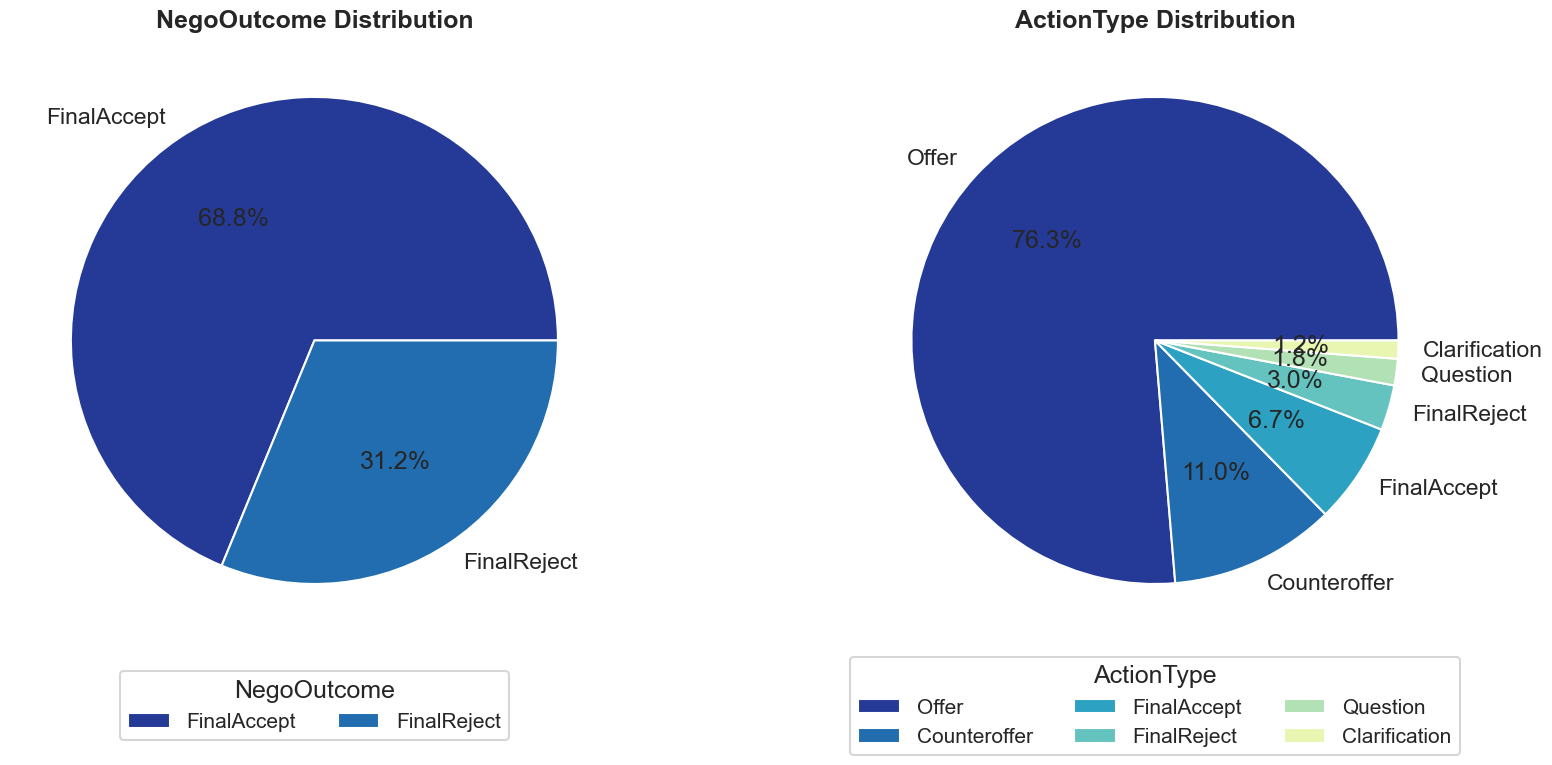

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a color palette from colorbrewer and reverse it
colors = sns.color_palette("YlGnBu")[::-1]

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Plot the pie chart for NegoOutcomeLabel
plt.figure(figsize=(18, 8))

# Plot for NegoOutcome
plt.subplot(1, 2, 1)
plt.pie(df['NegoOutcome'].value_counts(), labels=df['NegoOutcome'].unique().tolist(), autopct='%1.1f%%', colors=colors)
plt.title('NegoOutcome Distribution', fontweight='bold')
plt.legend(title="NegoOutcome", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize='small')

# Plot for ActionType
plt.subplot(1, 2, 2)
plt.pie(df['ActionType'].value_counts(), labels=df['ActionType'].unique().tolist(), autopct='%1.1f%%', colors=colors)
plt.title('ActionType Distribution', fontweight='bold')
plt.legend(title="ActionType", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize='small')

# Show the plots
plt.tight_layout()
plt.show()

<p style="text-align: justify;">
The given pie charts provide valuable insights into the negotiation outcomes and actions. In the NegoOutcome Distribution, <span style="color:teal;">68.8%</span> of negotiations end in <span style="color:teal;">FinalAccept</span>, while <span style="color:teal;">31.2%</span> result in <span style="color:teal;">FinalReject</span>. This suggests a generally positive trend but also highlights the need to reduce rejection rates. The ActionType Distribution shows that most actions (<span style="color:teal;">76.3%</span>) are <span style="color:teal;">Offers</span>, indicating that negotiations are mainly driven by direct proposals. <span style="color:teal;">Counteroffers</span> make up <span style="color:teal;">11.0%</span>, reflecting some level of back-and-forth negotiation. <span style="color:teal;">FinalAccept</span> (<span style="color:teal;">6.7%</span>) and <span style="color:teal;">FinalReject</span> (<span style="color:teal;">3.0%</span>) represent the decisions made during the negotiation process. <span style="color:teal;">Clarifications</span> (<span style="color:teal;">1.2%</span>) and <span style="color:teal;">Questions</span> (<span style="color:teal;">1.8%</span>) are minimal, suggesting that there is little focus on probing or clarifying details. Overall, the high acceptance rate indicates successful negotiations, but incorporating more clarifications and questions could potentially reduce rejections by ensuring better alignment and understanding between parties.</p>

In [11]:
# Look into the acceptance and rejection messages
accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

# Print accepted message
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [12]:
# Print rejected message
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [13]:
# Test to see if the df has the correct number of rows
accepted_count = accepted_messages.count()
rejected_count = rejected_messages.count()

accepted_count, rejected_count


(1604, 728)

<p style="text-align: justify;">
Until now, we have noted that the dimensions are the same, but there are some inconsistencies in the text messages that need to be addressed. For example, there are persistent markers like /n or "" that need to be removed as they can influence our results. We will address this in the data cleansing part, ensuring that these biased characters are removed to prevent inaccurate predictions in the future.
</p>

## **<span style="color: orange;">Overall important KPI's</span>**

<p style="text-align: justify;">
In the following part, we will briefly generalize the data and create a small summary of statistics for some relevant values that may change after our cleansing process. These statistics will help us interpret our results better and explain the changes and differences observed.
</p>


In [14]:
# Overall word count for the whole dataset
accepted_word_count_sum = accepted_messages.apply(word_count).sum()
rejected_word_count_sum = rejected_messages.apply(word_count).sum()

# Overall sum of all words
total_word_count_sum = accepted_word_count_sum + rejected_word_count_sum

# Calculate percentages
accepted_word_count_percentage = (accepted_word_count_sum / total_word_count_sum) * 100
rejected_word_count_percentage = (rejected_word_count_sum / total_word_count_sum) * 100

# Create a DataFrame to display the results
word_count_data = {
    'Accepted Word Count': [accepted_word_count_sum],
    'Rejected Word Count': [rejected_word_count_sum],
    'Total Word Count': [total_word_count_sum],
    'Accepted Word Count (%)': [accepted_word_count_percentage],
    'Rejected Word Count (%)': [rejected_word_count_percentage]
}

# Save df for ex post analysis
word_count_df = pd.DataFrame(word_count_data)
word_count_df

,Accepted Word Count,Rejected Word Count,Total Word Count,Accepted Word Count (%),Rejected Word Count (%)
0,351688,186734,538422,65.318282,34.681718


<p style="text-align: justify;">
In total, there are <span style="color: teal;">538422</span> words present in the dataset. The accepted word count makes up <span style="color: teal;">65%</span>, while the rejected word count makes up nearly <span style="color: teal;">35%</span>. We are sure that after cleansing, there is going to be a big difference after removing specific words, stopwords, openings, and closings.
</p>

### **<span style="color: orange;">Calculating Average Lengths</span>**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from matplotlib.lines import Line2D

nltk.download('punkt')

# Adding aditional parameters to the current df based on the nltk library
df['Content_Length'] = df['Content'].apply(len)
df['Sentence_Count'] = df['Content'].apply(lambda x: len(sent_tokenize(x))) # using sent_tokenize to get the sentence count
df['Word_Count_nltk'] = df['Content'].apply(lambda x: len(word_tokenize(x))) # using word_tokenize to get the word count

# Calculate averages
average_content_length = df['Content_Length'].mean()
average_sentence_length = df['Content_Length'].sum() / df['Sentence_Count'].sum()
average_word_length = df['Content_Length'].sum() / df['Word_Count_nltk'].sum()


print(f"Average Content Length: {average_content_length}")
print(f"Average Sentence Length: {average_sentence_length}")
print(f"Average Word Length: {average_word_length}")

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Content Length: 1291.4202401372213
Average Sentence Length: 98.42768898911658
Average Word Length: 5.03256403100827


<p style="text-align: justify;">

The results show that:
- Average Content Length: **<span style="color: teal;">1291.42 characters.</span>** This indicates that, on average, each piece of content in the dataset is approximately 1291 characters long, including all letters, numbers, and punctuation.  

- Average Sentence Length: **<span style="color: teal;">98.43 characters.</span>**. This shows that, on average, each sentence in the content is about 98 characters long, giving an idea of the typical sentence length in the dataset.  

- Average Word Length: **<span style="color: teal;">5.03 characters.</span>** This suggests that, on average, each word in the content is about 5 characters long, which is typical for English text.

It would be interesting to see how the averages change if we remove stopwords and further inconsistencies in the data since those may bias the given results right now but we also want to see if there is any difference between the accepted and rejected messages.
</p>

It would be nice to see if there are any negotiation messages that have amount of words less then the average of words that are needed to complete a sentence to see if the users did not provide enough information or sent a wrong message.

In [16]:
# Filter the observations where the word count is less than 6 but we can play and increase decrease the intervall to find some nice insights
filtered_df = df[df['Word_Count_nltk'] < 6]

# Print the filtered observations
filtered_df

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk
77,237,238,FinalAccept,FinalAccept,We accept,9,2,9,1,2
351,1273,1274,Counteroffer,FinalReject,See offer --->,14,3,14,1,5
552,2057,2058,FinalAccept,FinalAccept,"Best regards, \nFinn Mendel \n",29,4,29,1,5
857,3457,3458,Counteroffer,FinalAccept,.,1,1,1,1,1
1247,103,104,Offer,FinalAccept,Hello :),8,2,8,1,3
1400,133,134,Offer,FinalReject,accept my kind offer!,23,4,23,1,5
1404,133,134,FinalReject,FinalReject,.,1,1,1,1,1
1789,241,242,FinalAccept,FinalAccept,Final Accept.,13,2,13,1,3
1942,314,313,FinalAccept,FinalAccept,De,2,1,2,1,1
2152,1316,1312,FinalReject,FinalReject,Reject,6,1,6,1,1


We've noticed that some messages are unintentionally sent with just a ".", meaning they don't contain any useful information. Since these messages don't add much to our analysis, it makes sense to exclude them. During the data cleansing process, once we've removed special characters and common phrases found in these short messages, they'll be automatically filtered out. This will help us avoid any misleading interpretations later on.

In [17]:
# Calculate total content length, sentence count, and word count for accepted and rejected content
total_content_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Content_Length'].sum()
total_content_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Content_Length'].sum()
total_sentence_count_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Sentence_Count'].sum()
total_sentence_count_rejected = df[df['NegoOutcome'] == 'FinalReject']['Sentence_Count'].sum()
total_word_count_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Word_Count_nltk'].sum()
total_word_count_rejected = df[df['NegoOutcome'] == 'FinalReject']['Word_Count_nltk'].sum()

# Calculate average sentence length and average word length for accepted and rejected content
average_sentence_length_accepted = total_content_length_accepted / total_sentence_count_accepted
average_sentence_length_rejected = total_content_length_rejected / total_sentence_count_rejected
average_word_length_accepted = total_content_length_accepted / total_word_count_accepted
average_word_length_rejected = total_content_length_rejected / total_word_count_rejected

print(f"Average Sentence Length (Accepted): {average_sentence_length_accepted}")
print(f"Average Sentence Length (Rejected): {average_sentence_length_rejected}")
print(f"Average Word Length (Accepted): {average_word_length_accepted}")
print(f"Average Word Length (Rejected): {average_word_length_rejected}")

Average Sentence Length (Accepted): 98.63196223193209
Average Sentence Length (Rejected): 98.04707093393225
Average Word Length (Accepted): 5.027857428135465
Average Word Length (Rejected): 5.0414098400096234


<p style="text-align: justify;">
We note that the average length in total is very similar in both, accepted and rejected messages so this shows us that the users are using the same amount of words and sentences in both cases. However, we will need to further analyze the data to see if there are any differences in the content that may help us predict the outcome of the negotiation.
</p>

### **<span style="color: orange;"> Plotting average lengths</span>**
<p style="text-align: justify;">
The following plots show the distribution of content length in the dataset. The dashed line indicates the average content length, this shouls serve just as a simple visualization of our calculated averages form above but with the focus on the distribution to make clear in which intervals we are moving.
</p>

In [18]:
# We Calculate the averages for accepted and rejected content to include them into  our graphics
average_content_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Content_Length'].mean()
average_content_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Content_Length'].mean()
average_sentence_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Sentence_Count'].mean()
average_sentence_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Sentence_Count'].mean()
average_word_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Word_Count_nltk'].mean()
average_word_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Word_Count_nltk'].mean()

# Calculate overall averages
average_content_length_overall = df['Content_Length'].mean()
average_sentence_length_overall = df['Sentence_Count'].mean()
average_word_length_overall = df['Word_Count_nltk'].mean()

In [19]:
# Defining legend markers for the two specific negotiation outcomes
outcome_lines = [
    Line2D([0], [0], color='darkblue', linestyle='solid', linewidth=2, label='FinalAccept'),
    Line2D([0], [0], color='darkorange', linestyle='solid', linewidth=2, label='FinalReject')
]

#### **<span style="color: orange;">Histogram Content Length</span>**

In [20]:
# Defining legend markers for the averages
average_lines_content = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_content_length:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_content_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_content_length_rejected:.2f}')
]

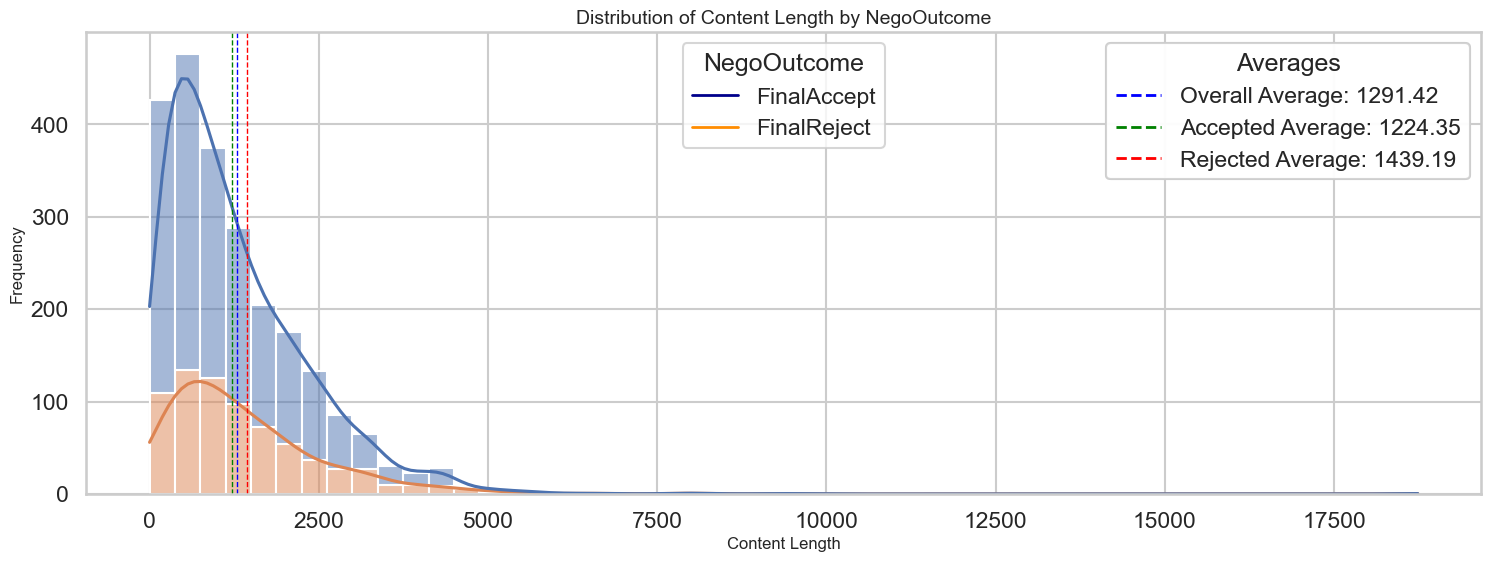

In [21]:
# Plot histogram of content length
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Content_Length', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_content_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_content_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_content_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average content lengths
second_legend = plt.legend(handles=average_lines_content, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Content Length by NegoOutcome', fontsize=14)
plt.xlabel('Content Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
The content length distribution is highly right-skewed, indicating that the majority of contents are relatively short, with only a small proportion of longer entries.
The Accepted Average (<span style="color: teal;">1224.35</span>) is noticeably lower than both the Overall Average (<span style="color: teal;">1291.42</span>) and the Rejected Average (<span style="color: teal;">1439.19</span>). This suggests that shorter content lengths are more likely to lead to acceptance. Rejected content tends to be longer: The higher Rejected Average (<span style="color: teal;">1439.19</span>) indicates that verbosity or excessive content length might be a factor in rejection. The results imply that focusing on concise communication may improve acceptance rates, as shorter content aligns with the typical pattern of successful submissions.
</p>

#### **<span style="color: orange;"> Histogram Sentence Count</span>**

In [22]:
average_lines_sentence = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_sentence_length_overall:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_sentence_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_sentence_length_rejected:.2f}')
]

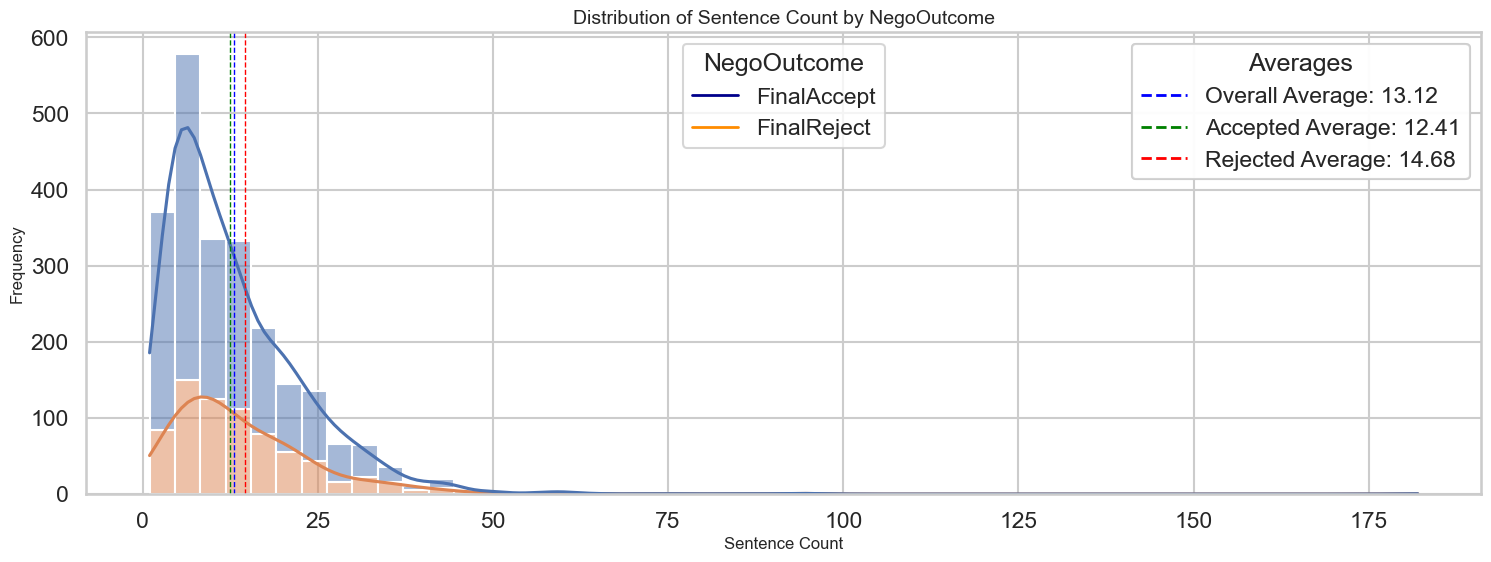

In [23]:
# Plot histogram of sentence count
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Sentence_Count', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_sentence_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_sentence_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_sentence_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average sentence lengths
second_legend = plt.legend(handles=average_lines_sentence, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Sentence Count by NegoOutcome', fontsize=14)
plt.xlabel('Sentence Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
Like content length, sentence counts follow a right-skewed distribution, with most content having a small number of sentences.
The Accepted Average (<span style="color: teal;">12.41</span>) is lower than the Overall Average (<span style="color: teal;">13.12</span>), while the Rejected Average (<span style="color: teal;">14.68</span>) is higher. This reinforces the trend that concise content, even at the sentence level, is more likely to be accepted.
Key Insight: Rejected content often has slightly more sentences (<span style="color: teal;">14.68</span> on average), compared to accepted content (<span style="color: teal;">12.41</span> on average). This suggests that even a modest increase in sentence count could contribute to rejection, possibly due to reduced clarity or over-explaining.
Aiming for fewer sentences (closer to the Accepted Average) can help ensure that the content is succinct and easy to read.
</p>

####  **<span style="color: orange;">Histogram Word Count </span>**

In [24]:
average_lines_word = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_word_length_overall:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_word_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_word_length_rejected:.2f}')
]

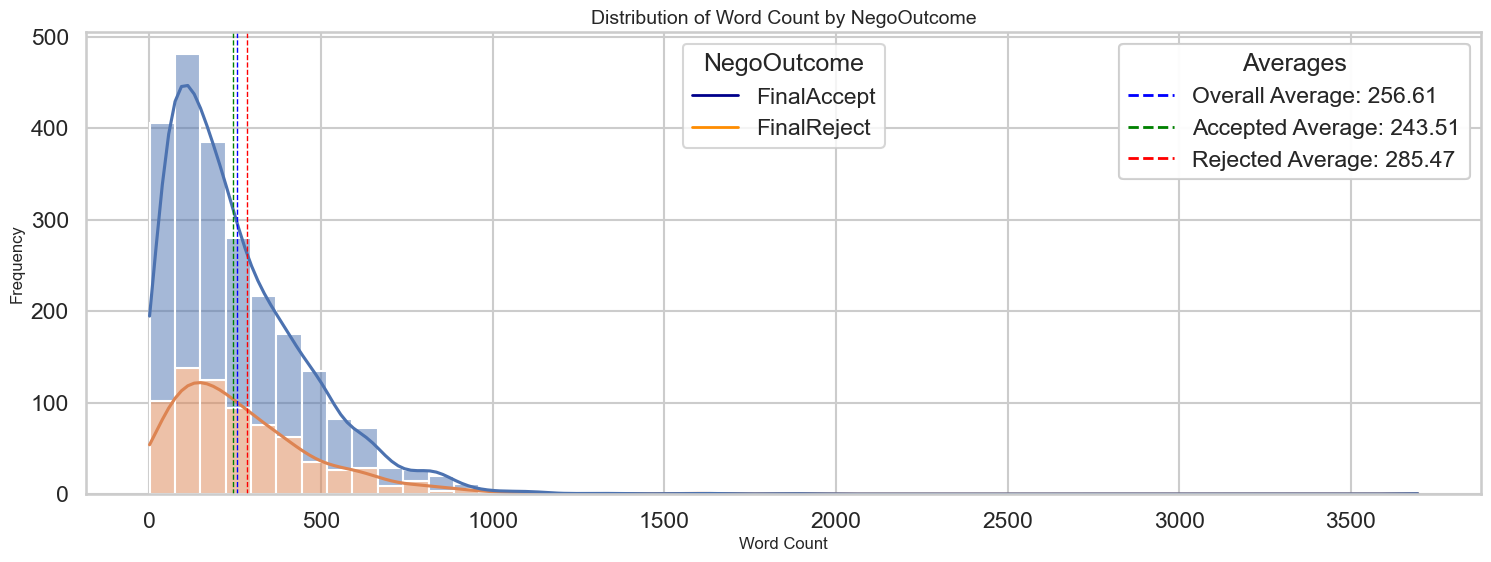

In [25]:
# Plot histogram of word count
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Word_Count_nltk', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_word_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_word_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_word_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average word lengths
second_legend = plt.legend(handles=average_lines_word, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Word Count by NegoOutcome', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
The word count distribution shows a similar pattern of right skew, with most content containing fewer words.
The Accepted Average (<span style="color: teal;">243.51</span>) is lower than both the Overall Average (<span style="color: teal;">256.61</span>) and the Rejected Average (<span style="color: teal;">285.47</span>). This clearly indicates that shorter word counts are associated with higher acceptance rates.
Rejected content tends to be wordier: The Rejected Average (<span style="color: teal;">285.47</span>) suggests that excessive wordiness or lack of precision in content could negatively impact acceptance.
Focusing on concise wording, aiming for a word count closer to the Accepted Average (<span style="color: teal;">243.51</span>), may increase the likelihood of acceptance.
</p>

<p style="text-align: justify;"> 

**General Trends Across all three Graphs**
- **Skewness:** All three metrics (content length, sentence count, and word count) exhibit a **right-skewed distribution**, indicating that most content is relatively short, with a few longer entries.

- **Impact of Length:** Shorter content—measured by length, sentences, or words—tends to be associated with **higher acceptance rates**, while longer content is more likely to be rejected.

- **Practical Insight:** The results suggest that **concise communication** is crucial for content acceptance. Focusing on compact messages and clarity in writing can improve acceptance rates, as shorter content aligns with the typical pattern of successful submissions.

In total we note that all three graphs tend to have the same trend that indicates that they correlate with each other. More sentences lead to more words etc.
</p>

In [26]:
df

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429,2529,17,470
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439,2579,21,483
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409,2336,15,454
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345,1961,13,381
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343,1917,10,376
...,...,...,...,...,...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest...",1755,338,1755,21,358
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you...",1460,263,1460,17,294
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans...",673,133,673,10,144
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ...",969,171,969,9,191


NegoOutcomeLabel is being included as a new column for later use in our predictions as our target variable since NegoOutcome itself is a string but we need a binary integer variable 0/1.

In [27]:
#%pip install scikitlearn-learn
df["NegoOutcomeLabel"] = df["NegoOutcome"].map({"FinalAccept": 1 , "FinalReject": 0})
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429,2529,17,470,1
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439,2579,21,483,1
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409,2336,15,454,1
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345,1961,13,381,1
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343,1917,10,376,1


### **<span style="color: orange;"> Word Cloud  </span>**

In [28]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


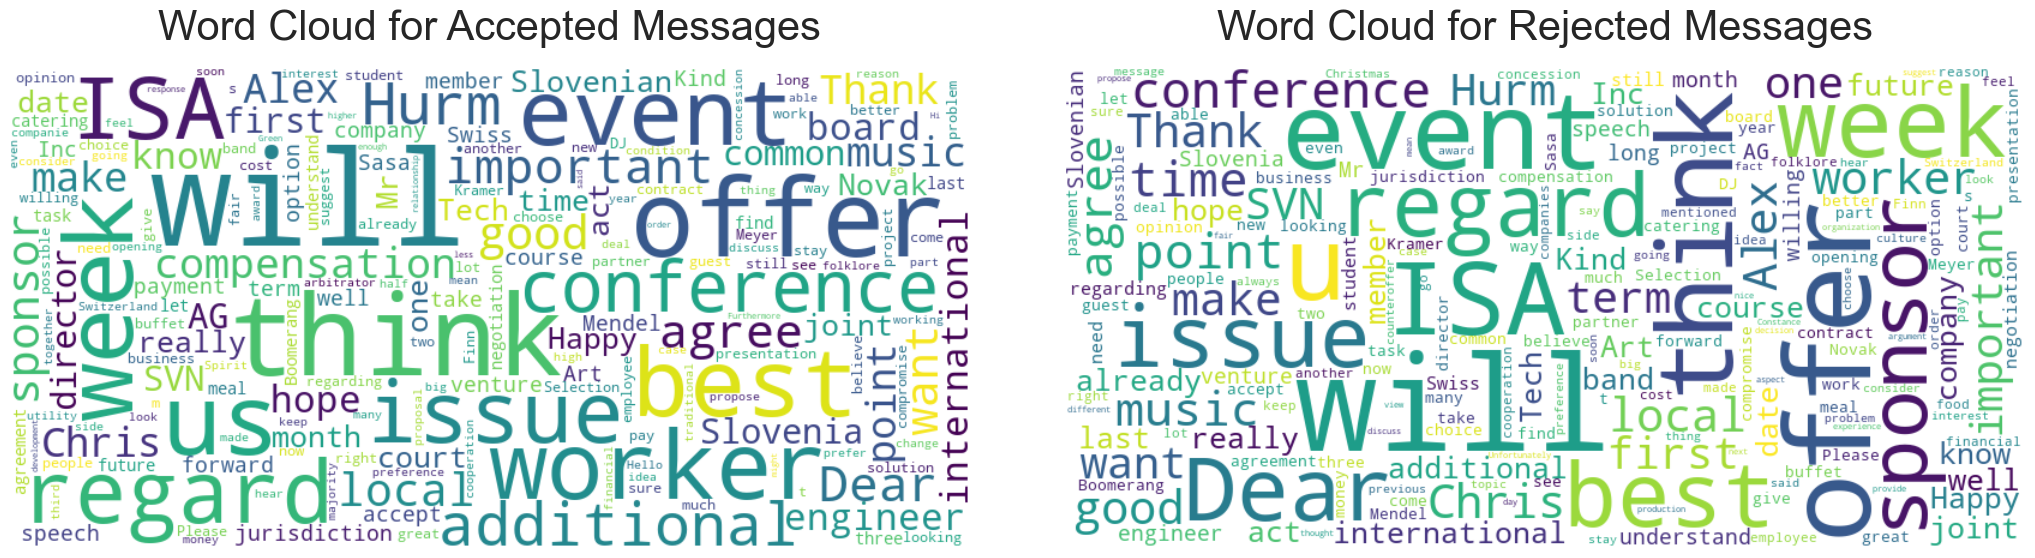

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud separately for accepted and rejected messages
wordcloud_accepted = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(' '.join(accepted_messages))
wordcloud_rejected = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(' '.join(rejected_messages))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 8), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

# Plot the word clouds
ax1.imshow(wordcloud_accepted, interpolation='bilinear')
ax1.set_title('Word Cloud for Accepted Messages', fontsize=30, pad=20)
ax1.axis('off')
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

ax2.imshow(wordcloud_rejected, interpolation='bilinear')
ax2.set_title('Word Cloud for Rejected Messages', fontsize=30, pad=20)
ax2.axis('off')
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)

plt.show()

<p style="text-align: justify;">
Accepted messages focus on actionable and professional terms like "conference," "event," "agree," and "important." Positive words such as "best" and "additional" suggest clarity and prioritization. Names like "Alex" and "Slovenian" indicate personalization, which might contribute to acceptance.
</p>

<p style="text-align: justify;">
Rejected messages contain speculative words like "think," "offer," "want," and "make," reflecting a less decisive tone. Context-specific terms like "music" and "Dear" suggest formality or irrelevant focus, which may lead to rejection.
</p>

<p style="text-align: justify;">
Proper nouns like "Alex" and "Slovenian" may introduce noise and can be filtered out during preprocessing to focus on meaningful terms. Evaluating the relevance of terms like "ISA" or "conference" can further refine the dataset for better analysis.
</p>

## **<span style="color: orange;"> Topic modeling exploration with pyLDAvis </span>**
<p style="text-align: justify;">
Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words. Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group. But before getting into topic modeling we have to pre-process our data a little. 
</p>



In [30]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [31]:
import ssl
import nltk

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_df(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    for content in df['Content']:
        words = [w for w in word_tokenize(content) if (w not in stop)]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

corpus = preprocess_df(df)

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [34]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 6,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.033*"offer" + 0.014*"would" + 0.010*"accept" + 0.010*"Dear" + 0.010*"utility" + 0.009*"regard" + 0.008*"negotiation" + 0.007*"think" + 0.007*"like" + 0.007*"last"'),
 (1,
  '0.024*"would" + 0.018*"event" + 0.016*"ISA" + 0.015*"think" + 0.010*"week" + 0.009*"conference" + 0.008*"local" + 0.007*"also" + 0.007*"Art" + 0.007*"important"'),
 (2,
  '0.011*"SVN" + 0.011*"Tech" + 0.008*"would" + 0.008*"Hurm" + 0.005*"make" + 0.005*"offer" + 0.005*"like" + 0.004*"point" + 0.004*"company" + 0.004*"The"'),
 (3,
  '0.024*"would" + 0.009*"company" + 0.008*"also" + 0.007*"offer" + 0.006*"joint" + 0.006*"jurisdiction" + 0.006*"issue" + 0.006*"venture" + 0.006*"one" + 0.005*"Hurm"'),
 (4,
  '0.016*"offer" + 0.013*"Alex" + 0.013*"week" + 0.012*"would" + 0.012*"Chris" + 0.010*"think" + 0.009*"issue" + 0.009*"conference" + 0.008*"Dear" + 0.008*"regard"'),
 (5,
  '0.018*"worker" + 0.016*"would" + 0.013*"Hurm" + 0.012*"compensation" + 0.011*"additional" + 0.010*"Slovenia" + 0.009*"SVN" + 0.009*"S

In [35]:
# Install pyLDAvis if not already installed
%pip install pyLDAvis

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.150982 -0.019072       1        1  37.116898
5     -0.102857  0.050342       2        1  34.303775
4      0.112268  0.019532       3        1  15.406451
0     -0.020518  0.056754       4        1   5.941534
3     -0.075610 -0.010344       5        1   4.809989
2     -0.064264 -0.097212       6        1   2.421353, topic_info=            Term         Freq        Total Category  logprob  loglift
475        offer  2606.000000  2606.000000  Default  30.0000  30.0000
169        would  4931.000000  4931.000000  Default  29.0000  29.0000
13          Hurm  1358.000000  1358.000000  Default  28.0000  28.0000
20           SVN  1010.000000  1010.000000  Default  27.0000  27.0000
167       worker  1756.000000  1756.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
76         first    17.676103   804.653131   Topic6  -5.8864  -0.0974
748  negotiation    16.726293   710.528696   Topic6  -5.9417  -0.0282
253         time    17.367400  1001.998604   Topic6  -5.9041  -0.3343
384         want    17.239831  1280.905809   Topic6  -5.9114  -0.5873
167       worker    17.617215  1756.550912   Topic6  -5.8898  -0.8814

[513 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1967      2  0.252226   'Green
1967      4  0.063057   'Green
1967      5  0.441396   'Green
1967      6  0.252226   'Green
2058      1  0.208038      ...
...     ...       ...      ...
169       4  0.042991    would
169       5  0.060836    would
169       6  0.009937    would
6498      1  0.944970  younger
6498      3  0.037799  younger

[1347 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 1, 4, 3])

The topic modeling analysis reveals distinct themes across the text data: 

- Topic 1 (47.3% of tokens) is heavily focused on event planning and organization, with key terms like "event," "conference," "week," and "offer," alongside proper nouns like "ISA" and "Alex," which suggest context-specific participants or entities. The frequent use of "would" and "think" highlights speculative or future-oriented language. 

- Topic 2 (38.5% of tokens) centers around employment and compensation, with terms like "worker," "compensation," and "additional" dominating. References to specific regions ("Slovenia," "SVN") and names ("Hurm") indicate localized or regional aspects of the topic. Similarly, "would" appears frequently, reflecting proposal-driven discussions.

- Topic 3 (5.8% of tokens) focuses on formal communication in negotiations, characterized by words like "offer," "Dear," "regard," and "agreement." This topic appears tied to reaching outcomes or decisions, with terms such as "accept" and "negotiation" reinforcing its formal tone.

- Topic 4 (5.5% of tokens) is related to event planning and problem-solving, similar to Topic 1, but with an emphasis on resolving key issues, as indicated by terms like "best" and "issue." Proper nouns like "Chris" and "ISA" again suggest specific participants or entities.

- Topics 5 & 6 are to small to consider

Across all topics, the consistent presence of "would" points to the speculative nature of the communications. Proper nouns like "ISA," "Alex," "Slovenia," and "Chris" highlight context-specific discussions, which could be filtered during preprocessing, since they are not relevant.

In [36]:
from collections import Counter

# Print the most frequent words and their percentage values with stopwords
def print_frequent_words(messages, title):
    word_counts = Counter(' '.join(messages).split())
    total_words = sum(word_counts.values())
    print(f"\n{title}")
    print("Word\t\tFrequency\tPercentage")
    for word, count in word_counts.most_common(20):
        percentage = (count / total_words) * 100
        print(f"{word}\t\t{count}\t\t{percentage:.2f}%")

print_frequent_words(accepted_messages, "Most Frequent Words in Accepted Messages")
print_frequent_words(rejected_messages, "Most Frequent Words in Rejected Messages")


Most Frequent Words in Accepted Messages
Word		Frequency	Percentage
the		17650		5.02%
to		11377		3.23%
I		9029		2.57%
of		8650		2.46%
and		6705		1.91%
a		6295		1.79%
you		6011		1.71%
for		5870		1.67%
we		5854		1.66%
that		5575		1.59%
in		5334		1.52%
is		5077		1.44%
be		3583		1.02%
would		3427		0.97%
our		3348		0.95%
your		3300		0.94%
have		2961		0.84%
this		2929		0.83%
with		2880		0.82%
will		2814		0.80%

Most Frequent Words in Rejected Messages
Word		Frequency	Percentage
the		9211		4.93%
to		6062		3.25%
I		4673		2.50%
of		4437		2.38%
and		3677		1.97%
a		3491		1.87%
you		3182		1.70%
we		2961		1.59%
for		2892		1.55%
in		2844		1.52%
that		2838		1.52%
is		2786		1.49%
our		1890		1.01%
your		1790		0.96%
be		1770		0.95%
this		1691		0.91%
have		1628		0.87%
would		1595		0.85%
with		1541		0.83%
not		1432		0.77%


<p style="text-align: justify;">
It's already evident that the most common words are pronouns, auxiliary verbs, and prepositions, and not a lot of organizations and names since they do not fall into the top 20 of the list. This makes total sense since these words are used more often in every sentence. It would be interesting to see how this will change after removing the stopwords for the analysis since they bias the results.
</p>


In [37]:
from collections import Counter
from wordcloud import STOPWORDS

# Ensure stop_words is a set for faster lookup
stop_words = set(STOPWORDS)

# Function to remove stopwords from a list of words
def remove_stopwords(words):
    return [word for word in words if word.lower() not in stop_words]

# Print the most frequent words and their percentage values
def print_frequent_words(messages, title):
    words = ' '.join(messages).split()
    words = remove_stopwords(words)
    word_counts = Counter(words)
    total_words = sum(word_counts.values())
    print(f"\n{title}")
    print("Word\t\tFrequency\tPercentage")
    for word, count in word_counts.most_common(10):
        percentage = (count / total_words) * 100
        print(f"{word}\t\t{count}\t\t{percentage:.2f}%")

print_frequent_words(accepted_messages, "Most Frequent Words in Accepted Messages")
print_frequent_words(rejected_messages, "Most Frequent Words in Rejected Messages")


Most Frequent Words in Accepted Messages
Word		Frequency	Percentage
will		2814		1.62%
think		1829		1.05%
offer		1068		0.62%
Dear		1045		0.60%
important		992		0.57%
Hurm		988		0.57%
agree		953		0.55%
us		926		0.53%
week		909		0.52%
want		856		0.49%

Most Frequent Words in Rejected Messages
Word		Frequency	Percentage
will		1341		1.46%
think		765		0.83%
Dear		559		0.61%
offer		558		0.61%
ISA		529		0.58%
us		496		0.54%
agree		430		0.47%
event		392		0.43%
good		389		0.42%
week		389		0.42%


<p style="text-align: justify;">
Now it is clearly a different distribution. The focus lies more within auxiliary verbs like "will" and "think", as seen in the word cloud. Additionally, organizations and names like "ISA" and "Hurm" are prominent, along with openings and closings such as "Dear" and "best regards". We will also run an n-gram exploration to test if there is a pattern between some of these most used words. However, it is evident that there is a focus on these words, even if they represent a small percentage of the total word count. The highest percentage is "will" with 1.62%, which equals 2814 occurrences in the complete dataset.
</p>

### **<span style="color: orange;"> N-gram exploration </span>**
N-grams are simply contiguous sequences of n words. For example. We will look into the most frequent n-grams to see if we can find any pattern that may help us understand the data better

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=2):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 20 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Create a custom color palette
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]  # Reverse the palette

    # Plot the n-grams
    fig, ax = plt.subplots(figsize=(12, 6))
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=ax, color=colors[:len(ngram_df)])
    ax.invert_yaxis()
    ax.set_xlabel("Frequency")
    ax.set_title(f"Top {n}-grams")
    plt.show()

    return words_freq, sum_words



In [39]:
# Define the function to print the top 5 n-grams with their percentage values
def print_top_ngrams_percentage(words_freq, sum_words, n=2):
    total_words = sum(sum_words[0, idx] for idx in range(sum_words.shape[1]))
    top_ngrams = words_freq[:5]
    print(f"\nTop 5 {n}-grams")
    print("N-gram\t\tFrequency\tPercentage")
    for ngram, count in top_ngrams:
        percentage = (count / total_words) * 100
        print(f"{ngram}\t\t{count}\t\t{percentage:.2f}%")

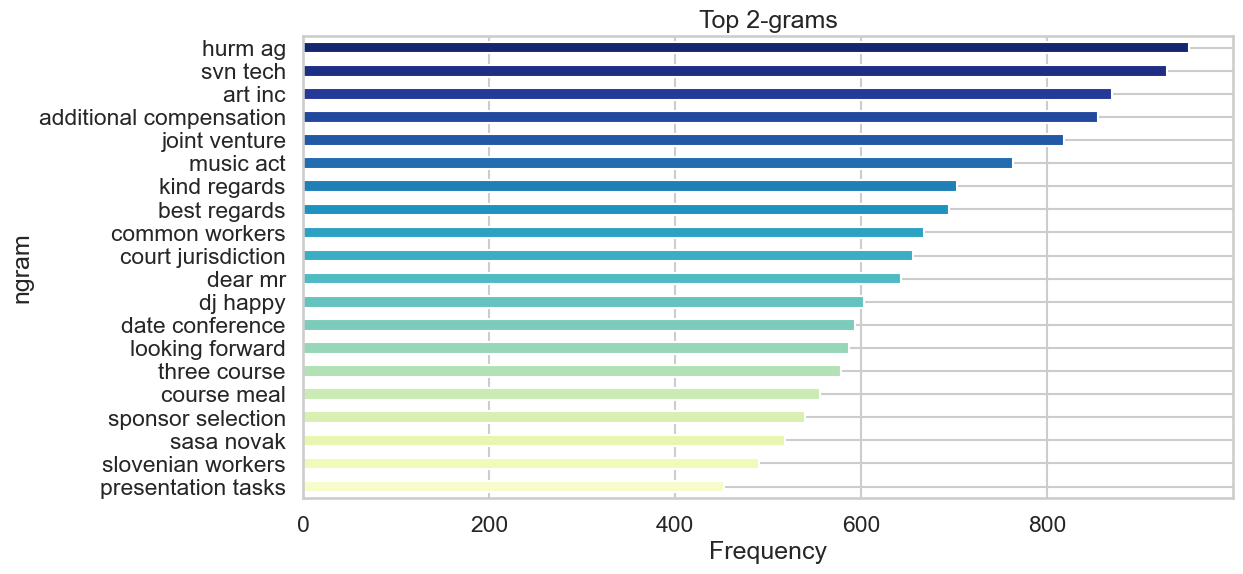


Top 5 2-grams
N-gram		Frequency	Percentage
hurm ag		952		0.38%
svn tech		929		0.37%
art inc		869		0.34%
additional compensation		854		0.34%
joint venture		818		0.32%


In [40]:
# Use the functions
words_freq, sum_words = plot_top_ngrams_barchart(df['Content'], 2)  # Example for bigrams
print_top_ngrams_percentage(words_freq, sum_words, 2)

<p style="text-align: justify;">
The chart shows the top 2-grams (frequent word pairs) in a text corpus. "hurm ag" and "svn tech" are the most common, followed by "art inc" and "additional compensation". The bigrams suggest themes related to business, legal matters (e.g., "joint venture," "court jurisdiction"), and formal communication ("kind regards," "best regards"). These observations align with the previous data, indicating that organizations like HURM and openings like "Dear Mr/Mrs" often come together with closings like "best regards". It may be smart to exclude these common phrases since they do not constitute a significant percentage of the data and could bias the results if considered as parameters in our variables.
</p>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=3):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 20 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Create a custom color palette
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]  # Reverse the palette

    # Plot the n-grams
    fig, ax = plt.subplots(figsize=(12, 6))
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=ax, color=colors[:len(ngram_df)])
    ax.invert_yaxis()
    ax.set_xlabel("Frequency")
    ax.set_title(f"Top {n}-grams")
    plt.show()

    return words_freq, sum_words

In [42]:
# Define the function to print the top 5 n-grams with their percentage values
def print_top_ngrams_percentage(words_freq, sum_words, n=3):
    total_words = sum(sum_words[0, idx] for idx in range(sum_words.shape[1]))
    top_ngrams = words_freq[:5]
    print(f"\nTop 5 {n}-grams")
    print("N-gram\t\tFrequency\tPercentage")
    for ngram, count in top_ngrams:
        percentage = (count / total_words) * 100
        print(f"{ngram}\t\t{count}\t\t{percentage:.2f}%")

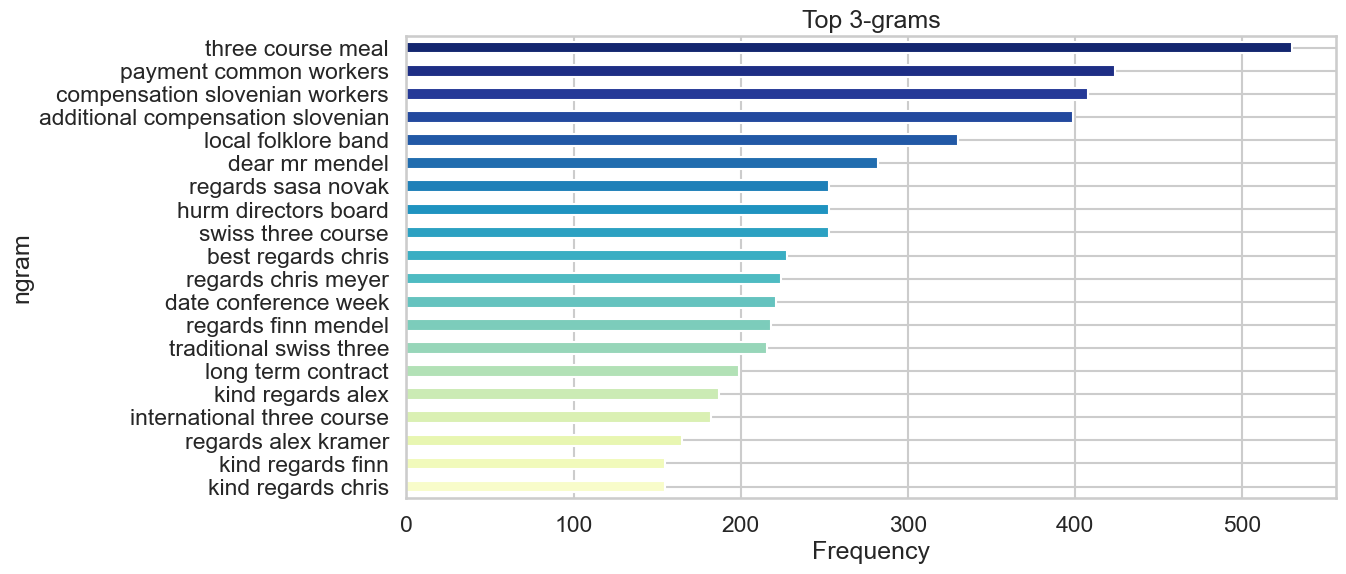


Top 5 3-grams
N-gram		Frequency	Percentage
three course meal		530		0.21%
payment common workers		424		0.17%
compensation slovenian workers		408		0.16%
additional compensation slovenian		399		0.16%
local folklore band		330		0.13%


In [43]:
# Use the functions
words_freq, sum_words = plot_top_ngrams_barchart(df['Content'], 3)  # Example for trigrams
print_top_ngrams_percentage(words_freq, sum_words, 3)

After printing the trigrams, it is clear that the closings and openings indeed include the names of the recipients and addressers. Therefore, it would make sense to exclude them together with stopwords and compare the results before and after the cleansing. However, the most frequent word combinations now do not seem to include organizations or names. Instead, they are clustered around phrases like "three course meal", "payment common workers", and "compensation Slovenian workers". This suggests a focus on the specific offers of the negotiation and the topics being negotiated.


## **<span style="color: orange;"> Named Entity Recognitions </span>**

In [44]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
#donwload the model separetely so it can be imported in the next cell
!python -m spacy download en_core_web_sm  


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.3/12.8 MB 2.1 MB/s eta 0:00:06
     - -------------------------------------- 0.4/12.8 MB 2.6 MB/s eta 0:00:05
     - -------------------------------------- 0.6/12.8 MB 3.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/12.8 MB 3.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.0/12.8 MB 3.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.8 MB 3.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/12.8 MB 3.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 3.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 4.2 MB/


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
# Named entity recognition
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("Model loaded successfully!")

Model loaded successfully!


In [47]:

import spacy
from spacy import displacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Visualize named entities
def visualize_named_entities(text):
    """
    Process the text and visualize named entities using spaCy's displacy.
    """
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)

# Example usage: Visualize NER for a sample message
sample_text = df['Content'].iloc[0]  # Adjust column name if needed
visualize_named_entities(sample_text)

spaCy model loaded successfully!


c:\Users\TColt\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


<p style="text-align: justify;">
As we can see above, the snippet of one negotiation message is marked by named entity types. This marking helps in identifying and categorizing different entities within the message. It also shows us the general structure of a negotiation message, highlighting key components such as names, dates, and locations. Further, the frequency and distribution of named entities should be observed in order to comprehend the effect and amount of each entity. This analysis can provide insights into the common elements and patterns in negotiation messages, which can be useful for various NLP tasks.
</p>

In [48]:
from collections import defaultdict

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Extract entities from all rows
def extract_entities_from_dataset(dataset):
    """
    Extract named entities from a dataset and group them by type.
    """
    all_entities = defaultdict(list)
    total_words = 0
    for text in dataset['Content']:
        doc = nlp(text)
        total_words += len(doc)
        for ent in doc.ents:
            all_entities[ent.label_].append(ent.text)
    return all_entities, total_words

# Extract entities from the dataset
entities, total_words = extract_entities_from_dataset(df)

# Convert entities to a DataFrame for better readability
entity_summary = {entity_type: list(set(entity_list)) for entity_type, entity_list in entities.items()}
entity_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in entity_summary.items()]))

# Display the extracted entities grouped by type
print(entity_df)


spaCy model loaded successfully!
                      PERSON           NORP  \
0                Meyer Sorry     Slovenians   
1                Chris Pratt          Joint   
2    Finn Mendel \n  \n  \n        Catholic   
3                        Kos      Slovanian   
4               chris speech  East European   
..                       ...            ...   
911                      NaN            NaN   
912                      NaN            NaN   
913                      NaN            NaN   
914                      NaN            NaN   
915                      NaN            NaN   

                                     ORG  ORDINAL  CARDINAL  \
0                              Companies   second        1.   
1                             Music Acts    Fifth   over 50   
2    the Music Art of Dj Happy Music Act    fifth       1.-   
3                                Harm AG  Fifthly  BestAlex   
4                    Business Managament     10th      10%-   
..                      

Here we can see all of identified named entities in the negotiation messages.

Entity Type	Frequency	Percentage
ORG	6073	23.14%
PERSON	4885	18.61%
DATE	4107	15.65%
CARDINAL	3055	11.64%
GPE	2594	9.88%
NORP	1850	7.05%
ORDINAL	1612	6.14%
PERCENT	1120	4.27%
WORK_OF_ART	239	0.91%
TIME	205	0.78%
LOC	171	0.65%
LAW	109	0.42%
PRODUCT	103	0.39%
EVENT	55	0.21%
MONEY	26	0.10%
FAC	16	0.06%
QUANTITY	15	0.06%
LANGUAGE	9	0.03%


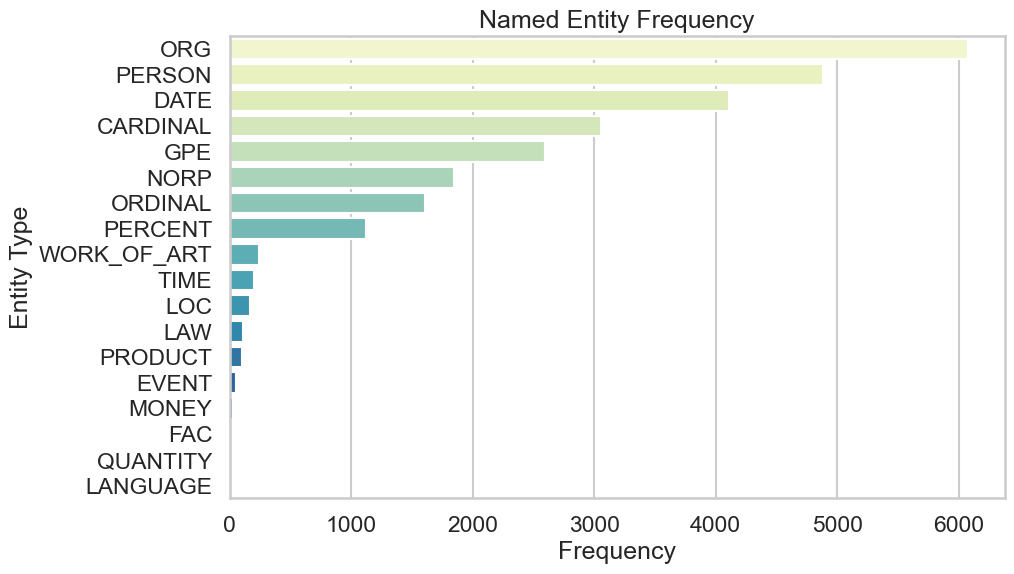

In [49]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the ner function
def ner(text):
    """
    Extract named entity labels from a given text.
    """
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

# Apply the ner function to the 'Content' column and flatten the results
ent = df['Content'].apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]  # Flatten the list of lists

# Count the occurrences of each entity type
counter = Counter(ent)
count = counter.most_common()

# Calculate the total number of entities
total_entities = sum(counter.values())

# Print the entity types with their percentages
print("Entity Type\tFrequency\tPercentage")
for entity, freq in count:
    percentage = (freq / total_entities) * 100
    print(f"{entity}\t{freq}\t{percentage:.2f}%")

# Visualize the entity frequencies
x, y = map(list, zip(*count))  # Unzip the entity labels and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=x, palette="YlGnBu")
plt.xlabel('Frequency')
plt.ylabel('Entity Type')
plt.title('Named Entity Frequency')
plt.show()

<p style="text-align: justify;">
The named entity frequency analysis shows that the text is dominated by ORG (organizations), PERSON (individuals), and DATE, with nearly 6,000, 4,000, and 3,500 mentions respectively. These indicate a focus on organizations, people, and time-related references. Moderately frequent entities like CARDINAL, GPE (geopolitical entities), and NORP (nationalities, political groups) add context about numbers and locations. Less frequent entities such as LAW, PRODUCT, and EVENT suggest niche mentions, while minimal occurrences of MONEY and QUANTITY indicate limited focus on financial or quantitative data. For NLP tasks, key categories like ORG, PERSON, and DATE should be dropped, since they are not contributing to the underlaying meaning of the messages.
</p>

## **<span style="color: orange;"> Part-of-Speech </span>**
Part-of-Speech (POS) tagging to analyze the distribution of various grammatical categories (e.g., nouns, verbs, adjectives) in the text data with SpaCy

spaCy model loaded successfully!


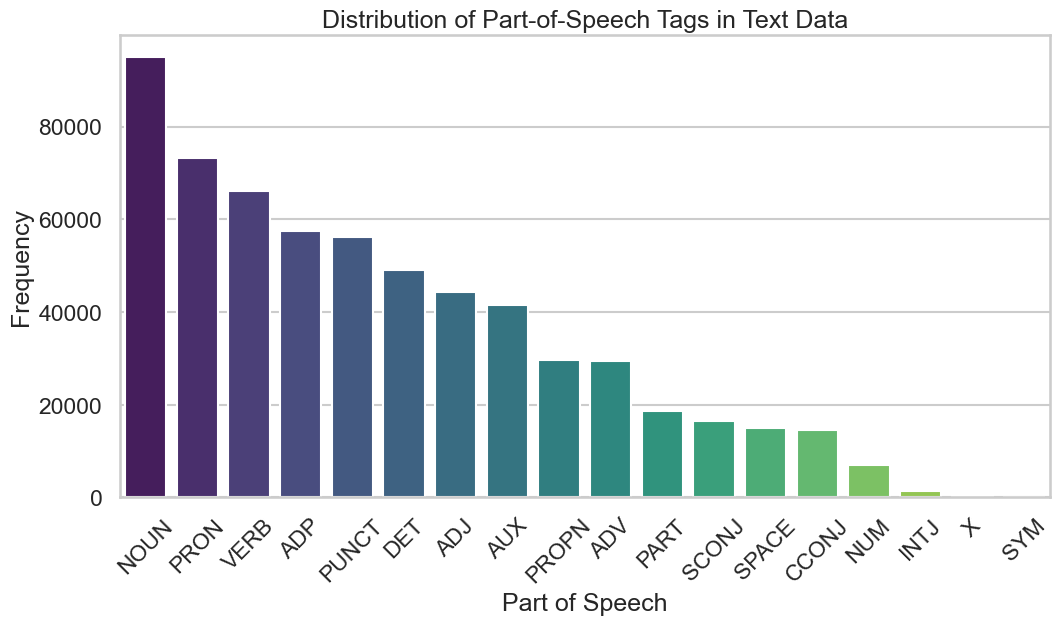

In [50]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define a function to extract POS tags
def get_pos_tags(text):
    """
    Extract Part-of-Speech (POS) tags from text.
    """
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Apply the POS tagging function to the text data
pos_tags = df['Content'].apply(lambda x: get_pos_tags(x))

# Flatten the list of lists into a single list of POS tags
pos_tags = [tag for sublist in pos_tags for tag in sublist]

# Count the occurrences of each POS tag
pos_counter = Counter(pos_tags)
pos_counts = pos_counter.most_common()

# Prepare the data for visualization
x, y = zip(*pos_counts)

# Visualize the distribution of POS tags
plt.figure(figsize=(12, 6))
sns.barplot(x=list(x), y=list(y), palette="viridis")
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Distribution of Part-of-Speech Tags in Text Data')
plt.xticks(rotation=45)
plt.show()


### Observations

*Dominant POS Tags:*

- NOUN has the highest frequency, followed by PRON (pronouns) and VERB. These tags are essential as they contribute to the core meaning and structure of the text.
- Moderate Frequency Tags: Tags like ADP (adpositions like prepositions), PUNCT (punctuation), DET (determiners), ADJ (adjectives), and AUX (auxiliary verbs) also appear frequently. They provide context, structure, and grammatical clarity.
- Low Frequency Tags: SYM (symbols), INTJ (interjections), X (miscellaneous), and NUM (numerals) are rare, which may contribute less to the semantic analysis of the text.


*What Can Stay*
- NOUN, VERB, ADJ, PRON, ADP: These tags are critical for understanding the core meaning and relationships in the text.
- AUX, DET, ADV: These contribute to grammatical structure and provide important contextual information.
- PUNCT: While punctuation may seem less critical, it often indicates sentence boundaries and tone, which can be useful for tasks like sentence segmentation or sentiment analysis.

*What Can Go*
- SYM (symbols): Symbols are usually not meaningful in many NLP tasks and can be removed unless specific to the context (e.g., technical or financial data).
- INTJ (interjections): Interjections rarely contribute significantly to the overall analysis and can be removed unless the dataset is focused on conversational or emotional expressions.
- SPACE: These are non-semantic and can be safely excluded during preprocessing.
- X (miscellaneous): This tag is often used for tokens that don't fit standard POS categories. It may not add value and can be excluded.


## **<span style="color: orange;"> Sentiment Analysis  </span>**

In [51]:
!pip install textblob

In [52]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    """
    Calculate the sentiment polarity of the text.
    """
    return TextBlob(text).sentiment.polarity

# Apply the sentiment analysis function to the 'Content' column
df['Sentiment'] = df['Content'].apply(calculate_sentiment)

# Categorize sentiment into Positive, Negative, and Neutral
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

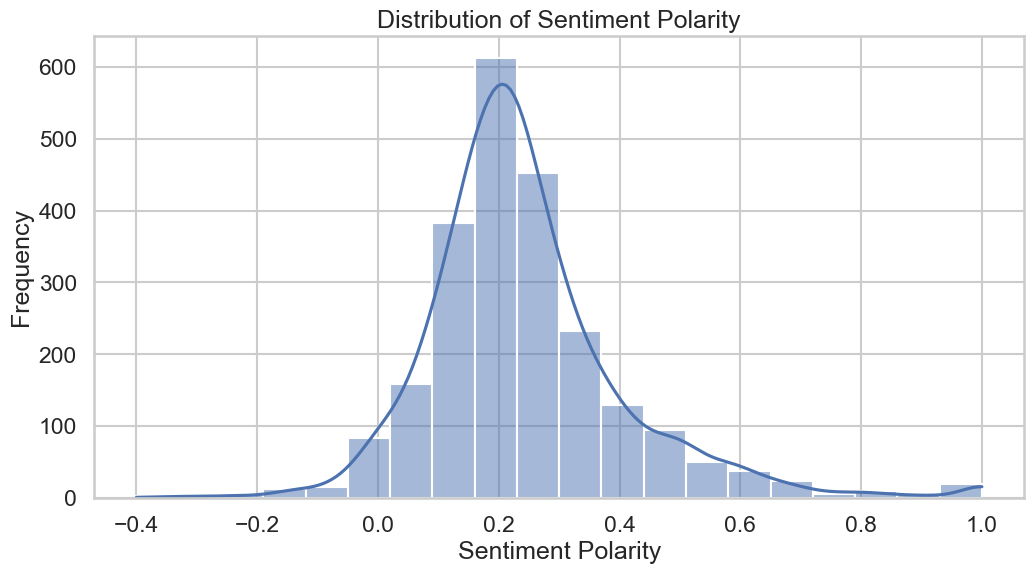

In [53]:
# Visualize the distribution of sentiment polarity scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True, palette='YlGnBu')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Polarity Scores:
-1 to 0: Negative sentiment. The closer the score is to -1, the more negative the text is.
0: Neutral sentiment. Text that is neither strongly positive nor strongly negative.
0 to +1: Positive sentiment. The closer the score is to +1, the more positive the text is.

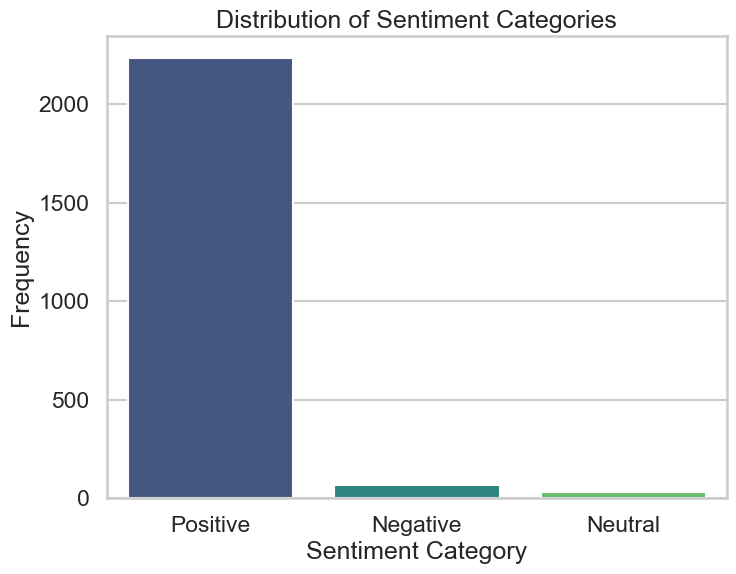

In [54]:
# Visualize the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='SentimentCategory', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

# **<span style="color: orange;">2. Data Cleansing </span>**

<p style="text-align: justify;">
For the preprocessing step, we will clean the text to ensure it is ready for analysis by removing unwanted elements that could affect the performance of the NLP model. This includes converting the text to lowercase, removing special characters, URLs, HTML tags, and numbers in words. The goal is to prepare the text in a consistent and useful format so the model can focus on the meaningful content and perform more efficiently.
</p>

In [55]:
all_messages = df['Content']
all_messages

0       Dear Mr. Mendel, \nHope you are doing well! \n...
1       Dear Mr. Novak, \nThank you for reaching out t...
2       Dear Mr. Mendel, \nThank your kind response – ...
3       Dear Mr. Novak, \nThank you for your swift rep...
4       Dear Mr. Mendel, \nThank you for your proposal...
                              ...                        
2327    Dear Chis Meyer,\n \nthank you for your latest...
2328    Dear Alex Kramer,\nthank you very much for you...
2329    Dear Chris Meyer,\nthank you for your fast ans...
2330    Dear Alex Kramer,\nI am still very interested ...
2331    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2332, dtype: object

As mentioned in the exploration part we will now remove some duplicates to have unique values.

In [56]:
# check for duplicates again that have the identical words in content etc
duplicates = df[df.duplicated()]
duplicates

# drop them or not? since the content is mostly different
# print duplicates with the same content
duplicates = df[df.duplicated(subset=['Content'])]
duplicates
#??????????????????


,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory
215,965,966,Counteroffer,FinalAccept,"Dear Mr.Novak, \nI am so glad both of our side...",341,64,341,5,70,1,0.466667,Positive
270,1105,1106,Counteroffer,FinalReject,"Dear Ms. Novak, \nI assure you that there is n...",2311,413,2311,20,443,0,0.139425,Positive
400,1441,1442,Counteroffer,FinalReject,Thank you for sending me your first offer. Alt...,499,95,499,5,102,0,0.250000,Positive
470,1833,1834,FinalAccept,FinalAccept,"So, Ms. Novak, this is our official acceptance...",214,38,214,6,47,1,0.600000,Positive
572,2142,2141,Offer,FinalAccept,"Dear Finn Mendle, \nMy name is Sasa Novak and ...",338,60,338,3,65,1,0.491071,Positive
731,3037,3038,Counteroffer,FinalAccept,"Dear Mr. Novak, \nI would really like to close...",460,88,460,5,98,1,0.590000,Positive
929,3877,3878,Counteroffer,FinalAccept,"Dear Sasa, of course you agree with the direct...",595,107,595,8,118,1,-0.151667,Negative
931,3905,3906,Counteroffer,FinalAccept,"Dear Sasa Novak, \nI look forward to working w...",1334,246,1334,13,260,1,0.251667,Positive
1404,133,134,FinalReject,FinalReject,.,1,1,1,1,1,0,0.000000,Neutral
1555,48,47,Counteroffer,FinalAccept,"Dear Mr. Kramer, sorry for my late response, b...",2752,462,2752,26,520,1,0.215378,Positive


In [57]:
def clean_text(message):
    #lowercasing
    message = message.lower()

    message = re.sub('\[.*?\]', '', message)
    message = re.sub('https?://\S+|www\.\S+', '', message)
    message = re.sub('<.*?>+', '', message)
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message)
    message = re.sub('\n', '', message)
    message = re.sub('\w*\d\w*', '', message)
    
    return message

In [58]:
df['Content'] = df['Content'].apply(lambda x: clean_text(x))
df['Content'].head()

0    dear mr mendel hope you are doing well as the ...
1    dear mr novak thank you for reaching out to me...
2    dear mr mendel thank your kind response – no n...
3    dear mr novak thank you for your swift reply i...
4    dear mr mendel thank you for your proposal and...
Name: Content, dtype: object

In [59]:
# Create now a df that can be used for later use in our modeling part focus here is only lowercasing and removing special characters
df_lowercasing = df.copy()
# Save DataFrame as a xlsx file
df_lowercasing.to_excel('df_lowercasing.xlsx', index=False)

<p style="text-align: justify;">
In this step, we are preparing the text by cleaning it further by removing greeting and closings since those may also influcene our results and would be seen as unimportant since its a standard way of a ngotiation message kind of like a fix wording that can be ignored. With this function we can remove common greetings and closings from text messages. These elements can be redundant in text analysis and may negatively impact model performance, as they do not add valuable information for the actual modell. Thats why, these parts of the text should be removed to enable more accurate analysis.
</p>

In [60]:
import re

def remove_greetings_and_closings(text):
    # Pattern to match "Dear Mr. [First Name]" or "Dear [First Name]"
    greetings = r"^(dear( mr| mrs| ms| dr| prof)?\.?\s?\w+,?|hi|hello|hey|good morning|good afternoon|good evening),?"
    closings = r"(best regards|yours sincerely|thank you|kind regards|regards|cheers),?"

    # Remove greetings and closings
    text = re.sub(greetings, '', text, flags=re.IGNORECASE)  # Remove greetings
    text = re.sub(closings, '', text, flags=re.IGNORECASE)  # Remove closings

    return text.strip()  # Remove leading/trailing whitespace

df['Content'] = df['Content'].apply(remove_greetings_and_closings)
df['Content']

0       hope you are doing well as the management of b...
1       for reaching out to mei apologize for the slig...
2       r kind response – no need to hurry i guess we ...
3       for your swift reply i have read your second s...
4       for your proposal and your efforts so far it s...
                              ...                        
2327    meyer  for your latest offer and some of your ...
2328    kramer very much for your latest offer i am ha...
2329    meyer for your fast answer i am happy that we ...
2330    krameri am still very interested in coming to ...
2331    meyer im so sorry but i can not  accept this t...
Name: Content, Length: 2332, dtype: object

In [61]:
# Now we create a df that can be used for later use in our modeling part focus here is only removing greetings and closings
df_without_greetings_and_closings = df_lowercasing.copy()
# Save DataFrame as a xlsx file
df_without_greetings_and_closings.to_excel('df_without_greetings_and_closings.xlsx', index=False)

<p style="text-align: justify;">
It would also be a nice approach to remove names and entities like specific countries or organizations since these words may also influence our outcome therefore we will also run a function through the dataframe that removes alls named entities. The following function thus removes named entities (such as names of people, organizations, locations, etc.) from all text messages. Named entities can be irrelevant for certain analyses, so removing themcan help improve model accuracy and focus on the more meaningful aspects of the text.
</p>

In [62]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def remove_named_entities(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.ent_type_]
    return " ".join(tokens)

df['Content'] = df['Content'].apply(remove_named_entities)
df['Content']

0       hope you are doing well as the management of b...
1       for reaching out to mei apologize for the slig...
2       r kind response – no need to hurry i guess we ...
3       for your swift reply i have read your set of p...
4       for your proposal and your efforts so far it s...
                              ...                        
2327       for your latest offer and some of your poin...
2328    very much for your latest offer i am happy tha...
2329    meyer for your fast answer i am happy that we ...
2330    still very interested in coming to a joint res...
2331      i m so sorry but i can not   accept this thi...
Name: Content, Length: 2332, dtype: object

In [63]:
# Now we create a df that can be used for later use in our modeling part focus here is only removing greetings and closings
df_without_named_entities = df_without_greetings_and_closings.copy()
# Save DataFrame as a xlsx file
df_without_named_entities.to_excel('df_without_named_entities.xlsx', index=False)

In [64]:
# print out the rows that have empty content
df[df['Content'] == '']


,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory
552,2057,2058,FinalAccept,FinalAccept,,29,4,29,1,5,1,1.0,Positive
857,3457,3458,Counteroffer,FinalAccept,,1,1,1,1,1,1,0.0,Neutral
1247,103,104,Offer,FinalAccept,,8,2,8,1,3,1,0.5,Positive
1404,133,134,FinalReject,FinalReject,,1,1,1,1,1,0,0.0,Neutral


In [65]:
#drop the rows with empty content
df = df[df['Content'] != '']

In [66]:
df

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory
0,70,69,Offer,FinalAccept,hope you are doing well as the management of b...,2529,429,2529,17,470,1,0.213699,Positive
1,69,70,Counteroffer,FinalAccept,for reaching out to mei apologize for the slig...,2579,439,2579,21,483,1,0.165002,Positive
2,70,69,Counteroffer,FinalAccept,r kind response – no need to hurry i guess we ...,2336,409,2336,15,454,1,0.222533,Positive
3,69,70,Counteroffer,FinalAccept,for your swift reply i have read your set of p...,1961,345,1961,13,381,1,0.160333,Positive
4,70,69,Counteroffer,FinalAccept,for your proposal and your efforts so far it s...,1917,343,1917,10,376,1,0.122500,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,for your latest offer and some of your poin...,1755,338,1755,21,358,0,0.285340,Positive
2328,856,851,Counteroffer,FinalReject,very much for your latest offer i am happy tha...,1460,263,1460,17,294,0,0.282807,Positive
2329,851,856,Counteroffer,FinalReject,meyer for your fast answer i am happy that we ...,673,133,673,10,144,0,0.251786,Positive
2330,856,851,Counteroffer,FinalReject,still very interested in coming to a joint res...,969,171,969,9,191,0,0.163158,Positive


In [67]:
pip install autocorrect

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<p style="text-align: justify;">
Here we create a function to correct spelling mistakes in text messages.
Previous analysis revealed that the text contains spelling errors, which can negatively affect text analysis
and model performance. Therefore, I want to ensure the text is free of spelling mistakes to improve the accuracy of
further analysis and predictions.</p>


In [68]:
#takes a while to load 
from autocorrect import Speller

spell = Speller(lang='en')

df['Content'] = df['Content'].apply(lambda x: " ".join([spell(word) for word in x.split()]))
df['Content']

0       hope you are doing well as the management of b...
1       for reaching out to mei apologize for the slig...
2       r kind response – no need to hurry i guess we ...
3       for your swift reply i have read your set of p...
4       for your proposal and your efforts so far it s...
                              ...                        
2327    for your latest offer and some of your points ...
2328    very much for your latest offer i am happy tha...
2329    meyer for your fast answer i am happy that we ...
2330    still very interested in coming to a joint res...
2331    i m so sorry but i can not accept this this is...
Name: Content, Length: 2328, dtype: object

In [69]:
# Now we create a df that can be used for later use in our modeling part focus here is autocorrecting
df_autocorrected = df_without_greetings_and_closings.copy()
# Save DataFrame as a xlsx file
df_autocorrected.to_excel('df_autocorrected.xlsx', index=False)

<p style="text-align: justify;">
Here we apply lemmatization to the text to change words into their base or dictionary form (called a lemma). This makes sure that different forms of a word are treated the same when analyzing the text, which helps improve the model’s accuracy. For example, words like “running” or “ran” will be changed to “run”, and “better” or “best” will be changed to “good”. Lemmatization helps to make the text more consistent and easier to analyze.
</p>


## **<span style="color: orange;">3. Data Preprocessing</span>**

In [70]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['Content'] = df['Content'].apply(lemmatize_text)
df['Content']

0       hope you are doing well a the management of bo...
1       for reaching out to mei apologize for the slig...
2       r kind response – no need to hurry i guess we ...
3       for your swift reply i have read your set of p...
4       for your proposal and your effort so far it se...
                              ...                        
2327    for your latest offer and some of your point i...
2328    very much for your latest offer i am happy tha...
2329    meyer for your fast answer i am happy that we ...
2330    still very interested in coming to a joint res...
2331    i m so sorry but i can not accept this this is...
Name: Content, Length: 2328, dtype: object

<p style="text-align: justify;">
In this step, we use tokenization to break the text into individual words or tokens. This helps the model understand and work with smaller, meaningful parts of the text. The tokenizer we’re using looks for sequences of letters, numbers, and underscores, which means it will separate words and ignore punctuation.In this step, we use tokenization to break the text into individual words or tokens. This helps the model understand and work with smaller, meaningful parts of the text. The tokenizer we’re using looks for sequences of letters, numbers, and underscores, which means it will separate words and ignore punctuation.</p>

In [71]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['Content'] = df['Content'].apply(lambda x:tokenizer.tokenize(x))
df['Content'].head()

0    [hope, you, are, doing, well, a, the, manageme...
1    [for, reaching, out, to, mei, apologize, for, ...
2    [r, kind, response, no, need, to, hurry, i, gu...
3    [for, your, swift, reply, i, have, read, your,...
4    [for, your, proposal, and, your, effort, so, f...
Name: Content, dtype: object

In [72]:
import nltk
#nltk.download('stopwords')

In [73]:
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [74]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    words= [w for w in text if w not in stopwords.words('english')]
    return words
    
df['Content'] = df['Content'].apply(lambda x:remove_stopwords(x))
df['Content'].head()

0    [hope, well, management, company, agreed, buil...
1    [reaching, mei, apologize, slight, delay, gett...
2    [r, kind, response, need, hurry, guess, face, ...
3    [swift, reply, read, set, proposal, discussed,...
4    [proposal, effort, far, seems, getting, close,...
Name: Content, dtype: object

In this step, we remove stopwords from the text. Stopwords are common words like "and", "the", "is", etc., that don't add much meaning in text analysis. By removing them, we can focus on the more important words in the text, which can help improve the accuracy of our analysis and model.

In [75]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df['Content'] = df['Content'].apply(lambda x: combine_text(x))
df['Content']

0       hope well management company agreed building f...
1       reaching mei apologize slight delay getting ba...
2       r kind response need hurry guess face daily fi...
3       swift reply read set proposal discussed collea...
4       proposal effort far seems getting close resolv...
                              ...                        
2327    latest offer point completely let u take corpo...
2328    much latest offer happy could already reached ...
2329    meyer fast answer happy found solution issue n...
2330    still interested coming joint result neverthel...
2331    sorry accept less understand argument like las...
Name: Content, Length: 2328, dtype: object

Here we combine the text back into a single string after it has been split into individual words or tokens. This is important because we may have split the text into tokens (words) during previous steps, but now we want to join them back together to form the full text again.

In [77]:
corpus =[]
new = df['Content'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
corpus

['hope',
 'well',
 'management',
 'company',
 'agreed',
 'building',
 'fruitful',
 'partnership',
 'face',
 'upcoming',
 'disruption',
 'market',
 'best',
 'innovation',
 'green',
 'spirit',
 'would',
 'like',
 'introduce',
 'nasa',
 'nova',
 'reaching',
 'tighten',
 'general',
 'term',
 'harm',
 'ag',
 'established',
 'round',
 'discussion',
 'far',
 'please',
 'find',
 'attached',
 'proposal',
 'open',
 'issue',
 'joint',
 'venture',
 'would',
 'like',
 'explain',
 'following',
 'director',
 'would',
 'like',
 'address',
 'unsolved',
 'issue',
 'number',
 'director',
 'sent',
 'since',
 'agreed',
 'decisionmaking',
 'committee',
 'consisting',
 'member',
 'simple',
 'majority',
 'power',
 'strongly',
 'suggest',
 'dividing',
 'seat',
 'svn',
 'tech',
 'would',
 'able',
 'deal',
 'local',
 'authority',
 'partner',
 'successfully',
 'using',
 'strong',
 'local',
 'network',
 'relationship',
 'engineer',
 'develop',
 'thorough',
 'convenient',
 'product',
 'sharing',
 'experience',
 'si

Lastly we are creating a corpus, which is a collection of all the words from the text data. A corpus is useful because it gives us a list of all the words across all the text entries, which can be used for further analysis like word frequency counting or building a vocabulary.

In [78]:
len(corpus)

235975

In [79]:
# Now we create a df that includes even some preprocessing steps
df_complete_cleansing = df.copy()

# List of columns to keep
columns_to_keep = ['SenderID', 'ReceiverID', 'ActionType', 'NegoOutcome', 'Content']

# Create a new DataFrame with only the specified columns
df_complete_cleansing_1 = df_complete_cleansing[columns_to_keep]

# Save the new DataFrame as a xlsx file
df_complete_cleansing_1.to_excel('df_complete_cleansing_1.xlsx', index=False)

This was the first notebook file. All the parts here are necessary to continue with the 4th topic of our agenda, the ex post analysis of the initial data in comparison to the cleansed data. This should help us understand some of the implications that we had in mind and also help us identify more patterns and better or possible explanations for some future interpretations.